<a href="https://colab.research.google.com/github/dehpour/magnetobaryogenesis/blob/main/2211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fun(x, y):
    
    Ba1, Ba2, Ba3, Bb1, Bb2, Bb3, Bz, Va1, Va2, Va3, Vb1, Vb2, Vb3, Vz, Eta = y
    
    dBa1 = (alpha1*356*1e13*(x**-0.5)*(Vb1*Bz - Bb1*Vz) - (alpha1**2)*356*1e11*(x**-0.5)*Ba1 + 
            (alpha1**2)*3.64058638*1e39*(x**-1.5)*(Eta**2)*Va1 + 
            alpha1*4.70369037*1e13*(x**-0.5)*Eta*Ba1 - Ba1/x)
    
    dBa2 = (alpha2*356*1e13*(x**-0.5)*(Vb2*Bz - Bb2*Vz) - (alpha2**2)*356*1e11*(x**-0.5)*Ba2 + 
            (alpha2**2)*3.64058638*1e39*(x**-1.5)*(Eta**2)*Va2 + 
            alpha2*4.70369037*1e13*(x**-0.5)*Eta*Ba2 - Ba2/x)
    dBa3 = (alpha3*356*1e13*(x**-0.5)*(Vb3*Bz - Bb3*Vz) - (alpha3**2)*356*1e11*(x**-0.5)*Ba3 + 
            (alpha3**2)*3.64058638*1e39*(x**-1.5)*(Eta**2)*Va3 + 
            alpha3*4.70369037*1e13*(x**-0.5)*Eta*Ba3 - Ba3/x)
    
    dBb1 = (alpha1*356*1e13*(x**-0.5)*(Vz*Ba1 - Bz*Va1) - (alpha1**2)*356*1e11*(x**-0.5)*Bb1 + 
            (alpha1**2)*3.64058638*1e39*(x**-1.5)*(Eta**2)*Vb1 + 
            alpha1*4.70369037*1e13*(x**-0.5)*Eta*Bb1 - Bb1/x)
    dBb2 = (alpha2*356*1e13*(x**-0.5)*(Vz*Ba2 - Bz*Va2) - (alpha2**2)*356*1e11*(x**-0.5)*Bb2 + 
            (alpha2**2)*3.64058638*1e39*(x**-1.5)*(Eta**2)*Vb2 + 
            alpha2*4.70369037*1e13*(x**-0.5)*Eta*Bb2 - Bb2/x)
    dBb3 = (alpha3*356*1e13*(x**-0.5)*(Vz*Ba3 - Bz*Va3) - (alpha3**2)*356*1e11*(x**-0.5)*Bb3 + 
            (alpha3**2)*3.64058638*1e39*(x**-1.5)*(Eta**2)*Vb3 + 
            alpha3*4.70369037*1e13*(x**-0.5)*Eta*Bb3 - Bb3/x)
    
    dBz = -Bz/x
    
    dVa1 = alpha1*30.4*1e-35*(x**1.5)*Bb1*Bz - (alpha1**2)*71.2*1e17*(x**-0.5)*Va1
    dVa2 = alpha2*30.4*1e-35*(x**1.5)*Bb2*Bz - (alpha2**2)*71.2*1e17*(x**-0.5)*Va2
    dVa3 = alpha3*30.4*1e-35*(x**1.5)*Bb3*Bz - (alpha3**2)*71.2*1e17*(x**-0.5)*Va3
    
    dVb1 = -alpha1*30.4*1e-35*(x**1.5)*Ba1*Bz - (alpha1**2)*71.2*1e17*(x**-0.5)*Vb1
    dVb2 = -alpha2*30.4*1e-35*(x**1.5)*Ba2*Bz - (alpha2**2)*71.2*1e17*(x**-0.5)*Vb2
    dVb3 = -alpha3*30.4*1e-35*(x**1.5)*Ba3*Bz - (alpha3**2)*71.2*1e17*(x**-0.5)*Vb3
    
    dVz = 0
    
    dEta = (-1.28*1e-38*(x**1.5)*Eta*(Ba1**2+Ba2**2+Ba3**2+Bb1**2+Bb2**2+Bb3**2+Bz**2) + 
           alpha1*9.68538584*1e-39*(x**1.5)*(Ba1**2+Bb1**2) + 
           alpha2*9.68538584*1e-39*(x**1.5)*(Ba2**2+Bb2**2) + 
           alpha3*9.68538584*1e-39*(x**1.5)*(Ba3**2+Bb3**2) -
           alpha1*9.91*1e-13*(x**0.5)*(Eta**2)*(Va1*Ba1 + Vb1*Bb1) - 
           alpha2*9.91*1e-13*(x**0.5)*(Eta**2)*(Va2*Ba2 + Vb2*Bb2) - 
           alpha3*9.91*1e-13*(x**0.5)*(Eta**2)*(Va3*Ba3 + Vb3*Bb3) - 
           179.1*((1-x)/(x**0.5))*Eta)
    
    return dBa1, dBa2, dBa3, dBb1, dBb2, dBb3, dBz, dVa1, dVa2, dVa3, dVb1, dVb2, dVb3, dVz, dEta

alpha1 = 1e-7
alpha2 = 5e-7
alpha3 = 1e-6

y0 = [0, 0, 0, 0, 0, 0, 1e19, 1e-2, 1e-2, 1e-2, 1e-2, 1e-2, 1e-2, 0, 0]

x_span = [1e-4, 1]

sol = solve_ivp(fun=fun, t_span=x_span, y0=y0, method='LSODA',rtol=5e-10,atol=1e-40)

sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 18966
     njev: 397
      nlu: 397
      sol: None
   status: 0
  success: True
        t: array([1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
       9.98592159e-01, 9.99459146e-01, 1.00000000e+00])
 t_events: None
        y: array([[ 0.00000000e+000,  4.47213595e-037,  8.94427191e-037, ...,
         2.47557590e+016,  2.47266477e+016,  2.47085157e+016],
       [ 0.00000000e+000,  2.23606798e-036,  4.47213595e-036, ...,
         2.25382701e+008,  2.23455453e+008,  2.22261992e+008],
       [ 0.00000000e+000,  4.47213595e-036,  8.94427191e-036, ...,
         1.28472378e-015,  1.24457753e-015,  1.22017969e-015],
       ...,
       [ 1.00000000e-002,  1.00000000e-002,  1.00000000e-002, ...,
        -5.47764243e-047, -5.31107904e-047, -5.20978207e-047],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0

In [3]:
len(sol.t)

7834

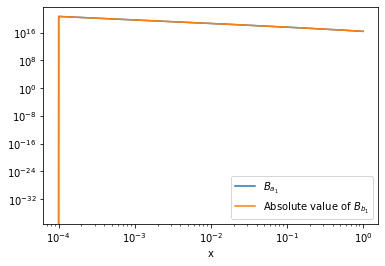

In [4]:
plt.plot(sol.t, sol.y[0],label='$B_{a_1}$')
plt.plot(sol.t, abs(sol.y[3]),label='Absolute value of $B_{b_1}$')
plt.legend()
plt.xlabel('x')
plt.xscale('log')
plt.yscale('log')
plt.show()

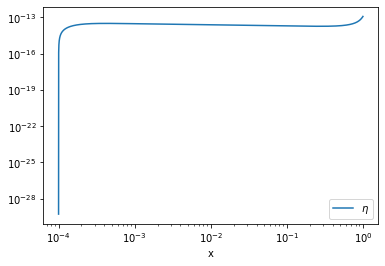

In [5]:
plt.plot(sol.t[150:], sol.y[14][150:],label='$\eta$')
plt.legend()
plt.xlabel('x')
plt.xscale('log')
plt.yscale('log')
plt.show()